In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    return (x_train, y_train), (x_test, y_test)

In [ ]:
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
def visualize_predictions(model, x_test, y_test, class_names):
    predictions = model.predict(x_test[:16])
    predicted_labels = np.argmax(predictions, axis=1)
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i])
        plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nActual: {class_names[y_test[i][0]]}")
    plt.show()

In [ ]:
def main():
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                   "Dog", "Frog", "Horse", "Ship", "Truck"]
    model = build_model(input_shape=x_train.shape[1:])
    model.summary()
    history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                        validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")
    plot_history(history)
    visualize_predictions(model, x_test, y_test, class_names)
    model_dir = "saved_model"
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, "cifar10_cnn_model.h5")
    model.save(model_path)
    print(f"Model saved at: {model_path}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 138ms/step - accuracy: 0.2934 - loss: 1.9005 - val_accuracy: 0.5310 - val_loss: 1.3239
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 144ms/step - accuracy: 0.5075 - loss: 1.3603 - val_accuracy: 0.6116 - val_loss: 1.0954
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.5888 - loss: 1.1601 - val_accuracy: 0.6593 - val_loss: 0.9862
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.6444 - loss: 1.0169 - val_accuracy: 0.6800 - val_loss: 0.9112
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 141ms/step - accuracy: 0.6764 - loss: 0.9205 - val_accuracy: 0.7152 - val_loss: 0.8235
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.7043 - loss: 0.8503 - val_accuracy: 0.7198 - val_loss: 0.8225
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 143ms/step - accuracy: 0.7268 - loss: 0.7844 - val_accuracy: 0.7172 - val_loss: 0.8236
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 140ms/step - accuracy: 0.7409 -

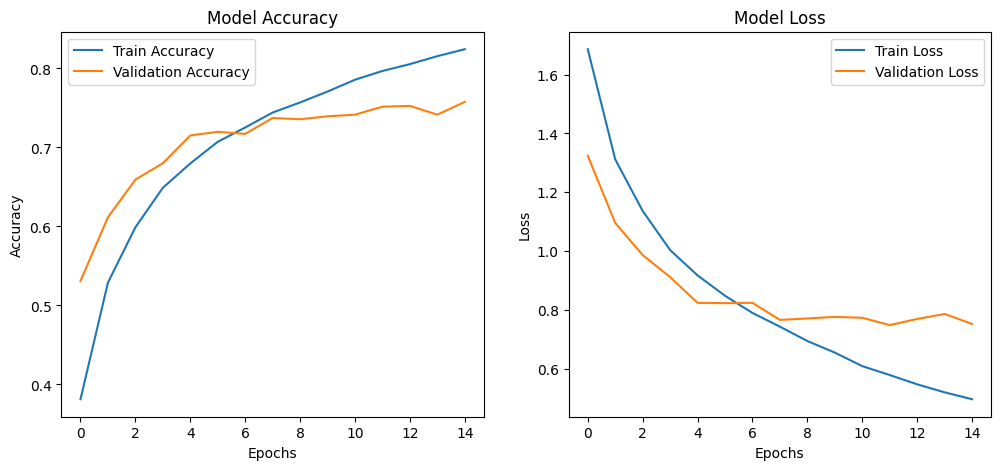

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


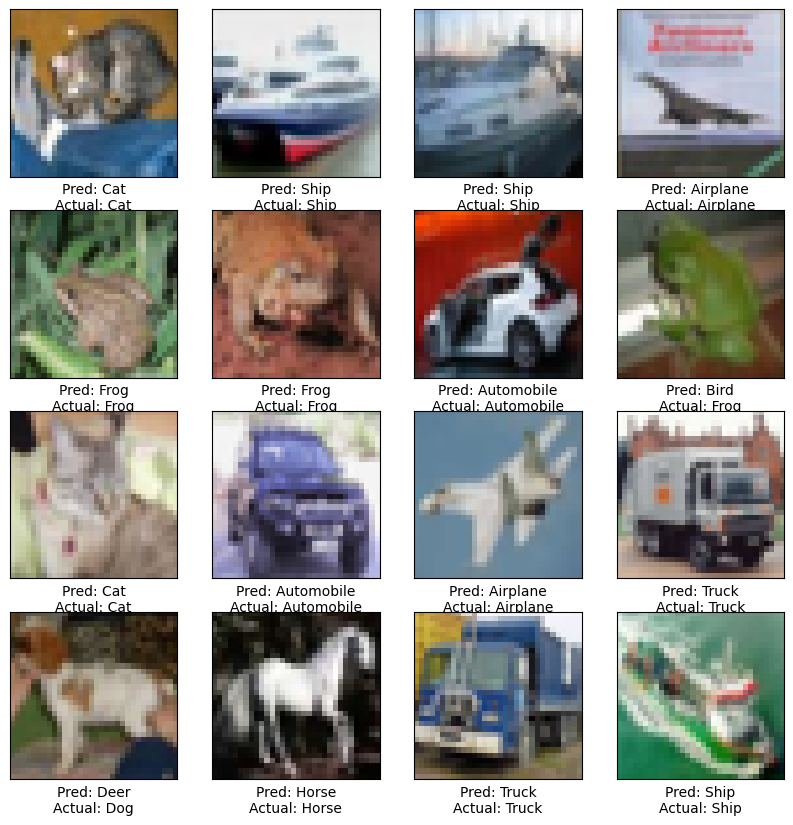

Model saved at: saved_model/cifar10_cnn_model.h5


In [ ]:
if __name__ == '__main__':
    main()